In [92]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## Downloading the Data
#### We download the dataset and loading it and we will take a look our dataset.

In [93]:
df = pd.read_csv("C:\\Users\\eevli\\Desktop\\Downloads\\Data-Collisions.csv")

C:\Users\eevli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

#### There are too many variables in our original data set that we will not be using. First of all, we will need to separate the most important variables that will affect the dependent variable "SEVERITYCODE" from the data set and categorize these variables.

In [95]:
df_var = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'SEVERITYCODE']]
df_var.head()

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Overcast,Wet,Daylight,NaN,2
1,Raining,Wet,Dark - Street Lights On,NaN,1
2,Overcast,Dry,Daylight,NaN,1
3,Clear,Dry,Daylight,NaN,1
4,Raining,Wet,Daylight,NaN,2


#### Fixing the "SPEEDING" field by encoding it to 0 for the blanks and 1 for the Y values.

In [96]:
df_var['SPEEDING'] = df_var['SPEEDING'].map({'Y': 1})
df_var['SPEEDING'].replace(np.nan, 0, inplace=True)
df_var['SPEEDING'].value_counts().to_frame()

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eevli\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SPEEDING
0.0,185340
1.0,9333


### We can see values such as Unknown and Other as null values. So we will replace these values with null values.

In [97]:
df_var.replace('Unknown', np.nan, inplace=True)
df_var.replace('Other', np.nan, inplace=True)
df_var['SEVERITYCODE'].replace('0', np.nan, inplace=True)

C:\Users\eevli\anaconda3\lib\site-packages\pandas\core\frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\eevli\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Now let's do some visualization and look at the effects of weather and driver speed on "SEVERITYCODE".

[Text(0, 0, 'Overcast'),
 Text(1, 0, 'Raining'),
 Text(2, 0, 'Clear'),
 Text(3, 0, 'Snowing'),
 Text(4, 0, 'Fog/Smog/Smoke'),
 Text(5, 0, 'Sleet/Hail/Freezing Rain'),
 Text(6, 0, 'Blowing Sand/Dirt'),
 Text(7, 0, 'Severe Crosswind'),
 Text(8, 0, 'Partly Cloudy')]

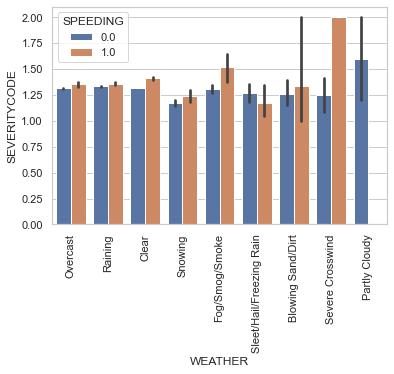

In [98]:
ax = sns.barplot(x="WEATHER", y="SEVERITYCODE", hue="SPEEDING", data=df_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Likewise, let's see how much ground condition and driver speed affect "SEVERITYCODE".

[Text(0, 0, 'Wet'),
 Text(1, 0, 'Dry'),
 Text(2, 0, 'Snow/Slush'),
 Text(3, 0, 'Ice'),
 Text(4, 0, 'Sand/Mud/Dirt'),
 Text(5, 0, 'Standing Water'),
 Text(6, 0, 'Oil')]

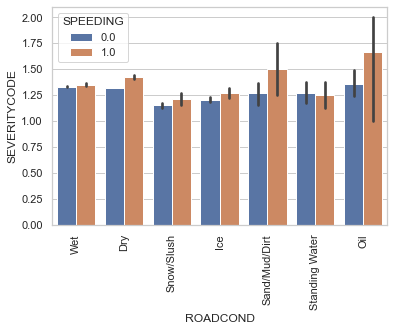

In [99]:
ax = sns.barplot(x="ROADCOND", y="SEVERITYCODE", hue="SPEEDING", data=df_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### And likewise we can look at the effects of ambient light conditions and driver speed.

[Text(0, 0, 'Daylight'),
 Text(1, 0, 'Dark - Street Lights On'),
 Text(2, 0, 'Dark - No Street Lights'),
 Text(3, 0, 'Dusk'),
 Text(4, 0, 'Dawn'),
 Text(5, 0, 'Dark - Street Lights Off'),
 Text(6, 0, 'Dark - Unknown Lighting')]

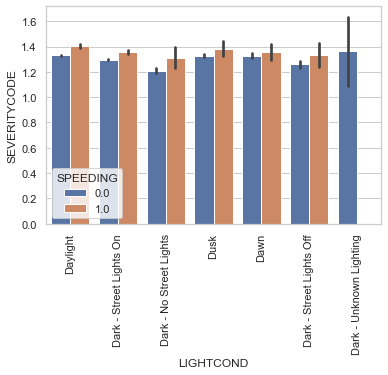

In [100]:
ax = sns.barplot(x="LIGHTCOND", y="SEVERITYCODE", hue="SPEEDING", data=df_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<AxesSubplot:>

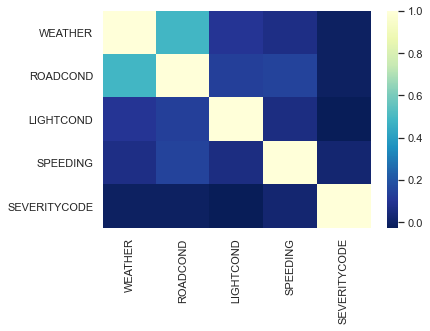

In [115]:
sns.heatmap(df_var.corr(), cmap='YlGnBu_r')

### As can be seen, using the seaborn library, we can visualize the effects of several variables on the dependent variable in this way and examine their effects. Apart from that, with the matplotlib library, we can find the reasons for the accidents by accessing the numbers of accidents that occurred in various conditions.

<AxesSubplot:>

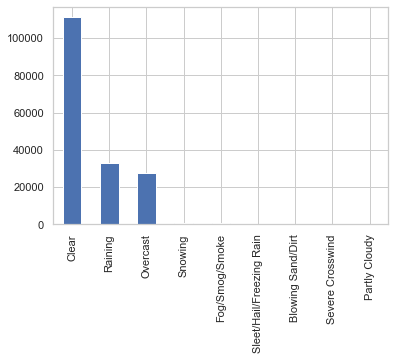

In [101]:
df_var["WEATHER"].value_counts().plot(kind = "bar")

<AxesSubplot:>

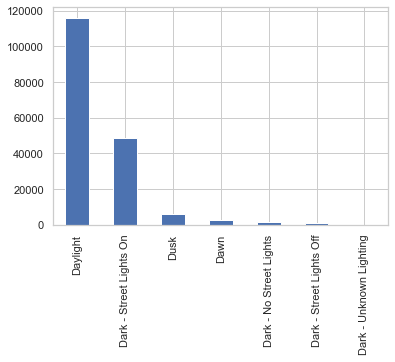

In [102]:
df_var["LIGHTCOND"].value_counts().plot(kind = "bar")

<AxesSubplot:>

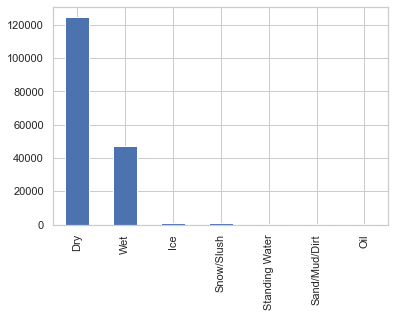

In [103]:
df_var["ROADCOND"].value_counts().plot(kind = "bar")

### As a result, it would not be surprising that many of the accidents occur during the daytime, on dry ground and outdoors, when the use of vehicles is higher. At this point, looking at the second conditions where accidents occur most can help us to make a healthier decision, and we can say that most of the accidents happen in the rainy, wet and evening hours.

## Before moving on to machine learning applications, arranging our data set to be suitable for work will help us get healthier results. Let's try to categorize variables and remove missing values from our data set.

In [104]:
df_var.dropna(inplace=True)

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
weather_map = {"Clear": 0, "Raining": 1, "Overcast":2, "Snowing":3,
               "Fog/Smog/Smoke":4, "Sleet/Hail/Freezing Rain":5,
               "Blowing Sand/Dirt":6, "Severe Crosswind":7, "Partly Cloudy":8}
df_var["WEATHER"] = df_var["WEATHER"].map(weather_map)
df_var["WEATHER"] = df_var["WEATHER"].astype("int64")

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [106]:
roadcond_map = {"Dry": 0, "Wet": 1, "Ice":2, "Snow/Slush":3, "Standing Water":4,
                "Sand/Mud/Dirt":5, "Oil":6}
df_var["ROADCOND"] = df_var["ROADCOND"].map(roadcond_map)
df_var["ROADCOND"] = df_var["ROADCOND"].astype("int64")

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [107]:
lightcond_map = {"Daylight": 0, "Dark - Street Lights On": 1, "Dusk":2, 
                 "Dawn":3, "Dark - No Street Lights":4, 
                 "Dark - Street Lights Off":5, "Dark - Unknown Lighting":6}
df_var["LIGHTCOND"] = df_var["LIGHTCOND"].map(lightcond_map)
df_var["LIGHTCOND"] = df_var["LIGHTCOND"].astype("int64")

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [110]:
df_var["SPEEDING"] = df_var["SPEEDING"].astype("int64")

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### After that, we can create our models.

In [116]:
from sklearn import preprocessing

x = df_var.drop(["SEVERITYCODE"], axis=1)
y = df_var[["SEVERITYCODE"]]
df_var_scaled = preprocessing.StandardScaler().fit(x).transform(x)
df_var_scaled[0:3]

array([[ 1.79168786,  1.30988802, -0.56684089, -0.23764147],
       [ 0.56237301,  1.30988802,  0.69194391, -0.23764147],
       [ 1.79168786, -0.57885829, -0.56684089, -0.23764147]])

In [117]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_var_scaled, y, 
                                                    test_size=0.2, random_state=42)

## KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
k = 15
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

KNN_Pred = KNN.predict(x_test)

C:\Users\eevli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


##### KNN Evaluation

In [142]:
from sklearn.metrics import jaccard_score
j = jaccard_score(y_test, KNN_Pred)

from sklearn.metrics import f1_score
f = f1_score(y_test, KNN_Pred, average = "macro")

print("Jaccard Score of KNN:", j, "\n" "f1 Score of KNN:", f)

Jaccard Score of KNN: 0.6624392556595946 
f1 Score of KNN: 0.41901298262342035


## Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 7).fit(x_train, y_train)
Tree_Pred = Tree.predict(x_test)

##### Decision Tree Evaluation

In [148]:
j1 = jaccard_score(y_test, Tree_Pred)

f1 = f1_score(y_test, Tree_Pred, average = "macro")

print("Jaccard Score of Decision Tree:Log_Reg", j1, "\n" "f1 Score of Decision Tree:", f1)

Jaccard Score of Decision Tree: 0.6709330037955689 
f1 Score of Decision Tree: 0.4019786277098676


## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(C=0.01)
Log_Reg.fit(x_train, y_train)
Log_Reg_Pred = Log_Reg.predict(x_test)

C:\Users\eevli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Log Reg Evaluation

In [163]:
j2 = jaccard_score(y_test, Log_Reg_Pred)

f2 = f1_score(y_test, Log_Reg_Pred, average = "macro")

print("Jaccard Score of Decision Tree:", j2, "\n" "f1 Score of Decision Tree:", f2)

Jaccard Score of Decision Tree: 0.6710108260767239 
f1 Score of Decision Tree: 0.401559831693104


In [169]:
Results = {'Model': ['KNN','Tree','Log Reg'],
        'Jaccard': [j,j1,j2],
        'F1': [f,f1,f2]}

df = pd.DataFrame(Results, columns = ['Model', 'Jaccard', 'F1'])

df

,Model,Jaccard,F1
0,KNN,0.662439,0.419013
1,Tree,0.670933,0.401979
2,Log Reg,0.671011,0.401560


## Conclusion

### It can be concluded that certain classes, such as weather conditions, road condition, driver speed, have some effect on injury in vehicle accidents under certain conditions. Our data set originally contained some variables and classes as objects, and we categorized them to apply our model on it. After getting rid of our lost values, we applied three machine learning algorithms, KNN, Decision Tree, and Logistic regression, on our model. The evaluation criteria used to test the accuracy of our models were the jaccard index and the f-1 score.